In [29]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft, fftfreq
import sounddevice as sd


In [ ]:
# Leitura do arquivo de Audio
signal, fs = sf.read('Audio.wav')


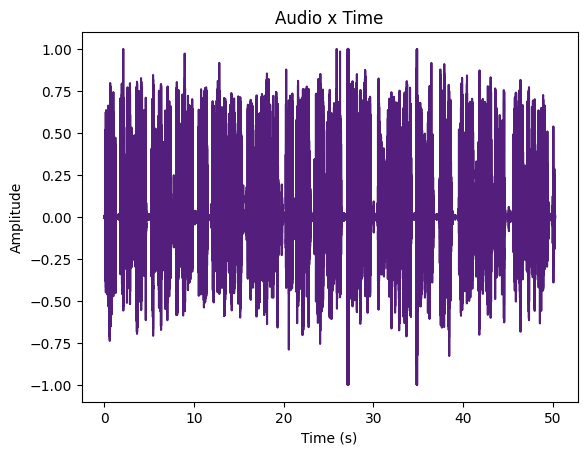

In [ ]:
# Plot do gráfico do domínio do tempo
t = np.linspace(0, len(signal)/fs, len(signal))
plt.plot(t, signal, color=plt.cm.twilight(0.4))
plt.title("Audio x Time")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [32]:
# transformada de fourier - converte o sinal do domínio do tempo pro domínio da frequência
n = fft(signal)
frequency_dom = fftfreq(len(n), 1/fs)

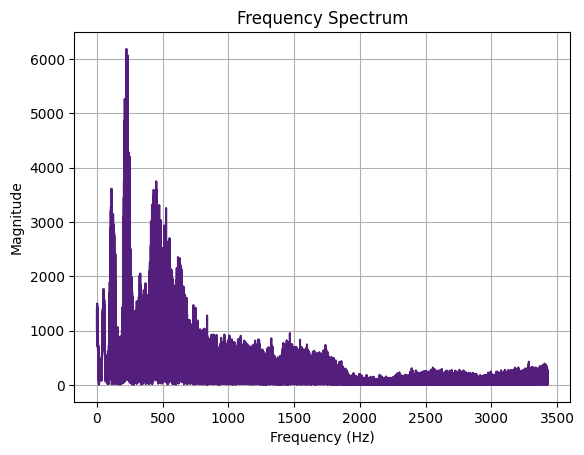

In [ ]:
# Plot do gráfico do domínio da frequência
plt.plot(frequency_dom[:len(n)//14], np.abs(n[:len(n)//14]),color=plt.cm.twilight(0.4))

plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

In [ ]:
# Função para aplicar filtros no domínio da frequência através da transformada de Fourier
#Parâmetros:
        #signal_fft (np.array): Coeficientes da FFT do sinal
        #frequencies (np.array): Array de frequências correspondente
        #filter_type (str): Tipo de filtro ('low', 'high', 'band')
        #cutoff_low (float): Frequência de corte inferior
        #cutoff_high (float): Frequência de corte superior (apenas para filtro banda)

def fft_filter(signal_fft, frequencies, filter_type, cutoff_low, cutoff_high=None):
    filtered = signal_fft.copy()
    if filter_type == 'low':
        filtered[np.abs(frequencies) > cutoff_low] = 0
    elif filter_type == 'high':
        filtered[np.abs(frequencies) < cutoff_low] = 0
    elif filter_type == 'band':
        if cutoff_high is None:
            raise ValueError("Para filtro 'band', por favor adicione um cutoff_high!")
        filtered[(np.abs(frequencies) < cutoff_low) | (np.abs(frequencies) > cutoff_high)] = 0
    else:
        raise ValueError("Tipo de filtro inválido.")

    return filtered

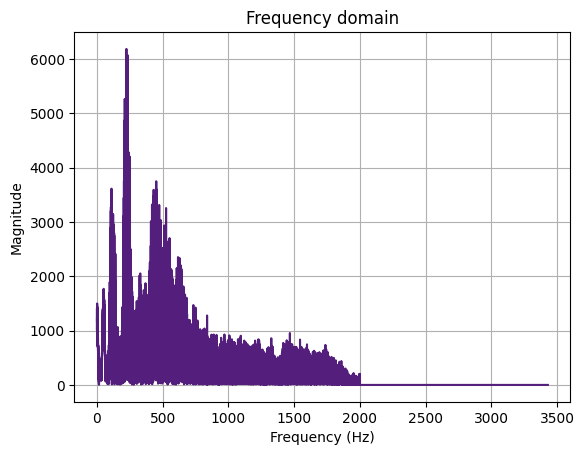

In [ ]:
# Plot do gráfico do domínio da frequencia com o filtro aplicado
frequency_dom_filtered = fft_filter(n, frequency_dom, 'low', 2000)
plt.plot(frequency_dom[:len(frequency_dom)//14], np.abs(frequency_dom_filtered[:len(n)//14]),color=plt.cm.twilight(0.4))
plt.title("Frequency domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

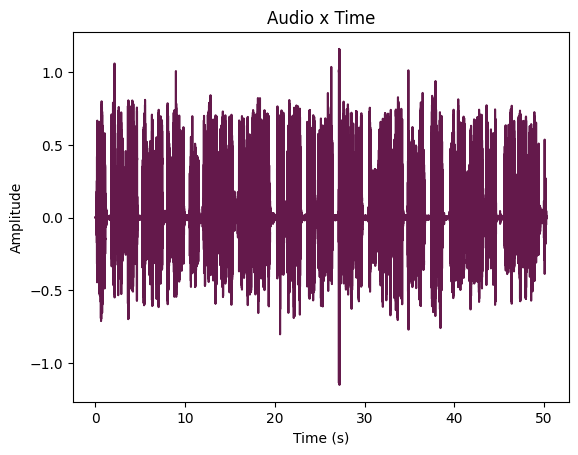

In [ ]:
# Plot do gráfico do domínio do tempo com o filtro aplicado através da transformada inversa de Fourier
time_dom_filtered = np.real(ifft(frequency_dom_filtered))
t = np.linspace(0, len(time_dom_filtered)/fs, len(time_dom_filtered))
plt.plot(t, time_dom_filtered, color=plt.cm.twilight(0.6))
plt.title("Audio x Time")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# Reproduz o áudio já filtrado
sd.play(time_dom_filtered, fs)